# Исследование интернет-магазина "Подарочек"


### Введение

В данном проекте рассматриваются данные интернет-магазина "Подарочек".Основные этапы проекта:

1. Подготовка данных к анализу
2. Предобработка данных
3. Исследовательский анализ
4. Расчет метрик
5. Статистический анализ

Основная задача проекта изучить, проанализировать данные и предоставить рекомендации заказчику по дальнейшему ведению бизнеса. Выделить наиболее активные категории клиентов и предложить стратегию по взаимодействию с ними. Оценить ключевые показатели бизнеса. На основе этих показателей сформулировать выводы о том, развивается бизнес или нет. Необходимо интерпретировать результаты максимально доступно, так как заказчик может не разбираться в аналитике и программировнии: строить максимально информативые и понятные графики, а также делать такие выводы, которые были бы понятны любому человеку.

###  Получение, осмотр и объединение данных


####  Загрузите данные из csv-файлов в датафреймы.


Импортируем необходимые библиотеки:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import plotly.express as px
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import ttest_ind
import copy
from scipy.stats import mannwhitneyu

Загрузим даные из csv-файлов:

In [ ]:
df_raw = pd.read_csv('https://code.s3.yandex.net/datasets/gift.csv',
                     parse_dates=["entry_date"],
                    dayfirst=True)
df_desc = pd.read_csv('https://code.s3.yandex.net/python-for-analytics/gift_entry.csv', sep=';')

In [ ]:
df_raw.head()

,entry_date,order_id,customer_id,quantity,price,name_clust,entry_id,country_id
0,2018-01-12 08:26:00,3031,2150,6,339,740,891,28
1,2018-01-12 08:26:00,3031,2150,8,275,132,1596,28
2,2018-01-12 08:26:00,3031,2150,6,339,197,166,28
3,2018-01-12 08:26:00,3031,2150,2,765,767,1810,28
4,2018-01-12 08:26:00,3031,2150,6,425,383,2585,28


In [ ]:
df_desc.head()

,entry_id,entry
0,0,NaN
1,1,10-цветная ручка Spaceboy
2,2,"12 карандашей, черепа"
3,3,"12 карандашей, высокий тюбик, лесной массив"
4,4,"12 карандашей, маленький тюбик с черепом"


#### Изучите общую информацию о датафреймах.

In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356940 entries, 0 to 356939
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   entry_date   356940 non-null  datetime64[ns]
 1   order_id     356940 non-null  int64         
 2   customer_id  356940 non-null  int64         
 3   quantity     356940 non-null  int64         
 4   price        356940 non-null  int64         
 5   name_clust   356940 non-null  int64         
 6   entry_id     356940 non-null  int64         
 7   country_id   356940 non-null  int64         
dtypes: datetime64[ns](1), int64(7)
memory usage: 21.8 MB


In [ ]:
df_desc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917 entries, 0 to 2916
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   entry_id  2917 non-null   int64 
 1   entry     2916 non-null   object
dtypes: int64(1), object(1)
memory usage: 45.7+ KB


#### Проверьте наличие пропусков, примите решение о заполнении.

In [ ]:
df_raw.isna().sum()

entry_date     0
order_id       0
customer_id    0
quantity       0
price          0
name_clust     0
entry_id       0
country_id     0
dtype: int64

В основном датафрейме пропусков нет.

In [ ]:
df_desc.isna().sum()

entry_id    0
entry       1
dtype: int64

В дополнительном датафрейме есть один пропуск.
___
Проверим, есть ли в основном датафрейме данные, в которых значение entry_id равно нулю:

In [ ]:
df_raw.loc[df_raw['entry_id'] == 0]

,entry_date,order_id,customer_id,quantity,price,name_clust,entry_id,country_id
395,2018-01-12 11:52:00,3080,-1,56,0,0,0,28
1269,2018-01-12 14:32:00,3211,-1,1,0,0,0,28
1270,2018-01-12 14:33:00,3212,-1,1,0,0,0,28
1271,2018-01-12 14:33:00,3213,-1,1,0,0,0,28
1272,2018-01-12 14:34:00,3215,-1,1,0,0,0,28
...,...,...,...,...,...,...,...,...
352492,2019-07-12 18:26:00,47865,-1,-2,0,0,0,28
352493,2019-07-12 18:31:00,47869,-1,15,0,0,0,28
352494,2019-07-12 18:35:00,47875,-1,6,0,0,0,28
353636,2019-08-12 10:33:00,47900,-1,27,0,0,0,28


In [ ]:
print(f'Доля данных, в которых значение столбца entry_id = 0 составляет: {round(df_raw.loc[df_raw["entry_id"] == 0].shape[0] / df_raw.shape[0], 3)}')

Доля данных, в которых значение столбца entry_id = 0 составляет: 0.004


Такие данные есть, но их очень мало (доля таких значений 0,004, т.е. менее половины процента) и их удаление не приведет к значительным изменениям общих данных.
___
Удалим такие строки в основном датафрейме, а также удалим пропуски в дополнительном датафрейме:

In [ ]:
df_raw = df_raw.query('entry_id != 0')
df_desc = df_desc.query('entry == entry')


In [ ]:
df_raw.loc[df_raw['entry_id'] == 0]

,entry_date,order_id,customer_id,quantity,price,name_clust,entry_id,country_id


In [ ]:
df_raw.isna().sum()

entry_date     0
order_id       0
customer_id    0
quantity       0
price          0
name_clust     0
entry_id       0
country_id     0
dtype: int64

In [ ]:
df_desc.isna().sum()

entry_id    0
entry       0
dtype: int64

Данные удалены. Пропусков нет в обоих датафреймах.

#### Проверьте наличие дубликатов, примите решение об удалении.

In [ ]:
df_raw.duplicated().sum()

3573

В датафрейме 3573 дубликатов. Удаление такого количества строк не изменит основные данные, поэтому их целесообразно удалить.

In [ ]:
df_raw = df_raw.drop_duplicates()
df_raw.duplicated().sum()

0

Дубликаты в основном датафрейме удалены.
___
Проверим убликаты в дополнительном датафрейме:

In [ ]:
df_desc.duplicated().sum()

0

В дополнительном датафрейме дубликатов нет.

#### Рассмотрите типы данных в каждом столбце, приведите типы (если нужно).

In [ ]:
display(df_raw.dtypes)

entry_date     datetime64[ns]
order_id                int64
customer_id             int64
quantity                int64
price                   int64
name_clust              int64
entry_id                int64
country_id              int64
dtype: object

In [ ]:
display(df_desc.dtypes)

entry_id     int64
entry       object
dtype: object

#### Проверьте соответствие идентификационных номеров.

Сравним столбцы в обоих датафреймах, по которым будем производить объединение:

In [ ]:
sorted(df_raw['entry_id'].unique()) == sorted(df_desc['entry_id'].unique())

True

Выполнил проверку соответствия идентификационных номеров в обоих датафреймах. Номера совпадают.

#### Объедините информацию из всех датафреймов в один.

Используем левое соединение таблиц (left). Так как нам необходимо оставить полную информацию из левого датафрейма.

In [ ]:
df = df_raw.merge(df_desc, on='entry_id', how='left')
df.head()

,entry_date,order_id,customer_id,quantity,price,name_clust,entry_id,country_id,entry
0,2018-01-12 08:26:00,3031,2150,6,339,740,891,28,белый металлический фонарь
1,2018-01-12 08:26:00,3031,2150,8,275,132,1596,28,кремовая вешалка в форме сердечек Купидона
2,2018-01-12 08:26:00,3031,2150,6,339,197,166,28,Вязаная грелка с флагом Союза
3,2018-01-12 08:26:00,3031,2150,2,765,767,1810,28,набор 7 скворечников для бабушек
4,2018-01-12 08:26:00,3031,2150,6,425,383,2585,28,стеклянный матовый держатель в форме звезды


In [ ]:
df.isna().sum()

entry_date     0
order_id       0
customer_id    0
quantity       0
price          0
name_clust     0
entry_id       0
country_id     0
entry          0
dtype: int64

In [ ]:
if len(df_raw) != len(df):
    print(f'Доля исключенных данных: {len(df) / len(df_raw)}')
else:
    print('Исключенных данных нет.')

Исключенных данных нет.


In [ ]:
df.duplicated().sum()

0

Объединил два датафрейма в один. Сделал проверку на пропуски. Пропусков нет. Исключенных данных нет. Дубликатов нет.

### Предобработка и начало исследовательского анализа

#### Найдите выбросы и аномальные значения в столбцах price и quantity, рассчитайте сумму стоимости каждой товарной позиции в датасете, примите и реализуйте решение о сохранении или отбрасывании подозрительных данных.

##### Изучим столбец price:

In [ ]:
df['price'].describe(percentiles= [0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

count    3.518580e+05
mean     4.034005e+02
std      5.095441e+03
min     -1.106206e+06
25%      1.250000e+02
50%      2.080000e+02
75%      4.130000e+02
90%      7.460000e+02
95%      9.950000e+02
99%      1.995000e+03
max      1.354133e+06
Name: price, dtype: float64

Применил метод describe() к столбцу price, добавив 90, 95 и 99 перцентиль. Из полученной информации видно, что в данных есть отрицательные значения стоиомости товара - это является аномальным значением. Также заметим, что максимальное значение сильно больше значения, соответсвтующему 99 перцентилю. Рассмотрим этот случай подробнее:

In [ ]:
df.sort_values('price', ascending = False).head()

,entry_date,order_id,customer_id,quantity,price,name_clust,entry_id,country_id,entry
9448,2018-07-12 15:08:00,4298,-1,1,1354133,14,1493,28,КОМИССИЯ АМАЗОН
194535,2019-12-08 14:50:00,29851,-1,1,1106206,0,1548,28,КОРРЕКТИРОВКА БЕЗНАДЕЖНЫЙ ДОЛГ
111135,2019-03-05 13:46:00,18363,3971,1,814275,1,2253,28,ПОЧТОВЫЕ РАСХОДЫ
193029,2019-11-08 10:14:00,29621,-1,1,450517,0,180,28,"ДОТКОМ, ПОЧТОВЫЕ РАСХОДЫ"
173646,2019-07-18 12:30:00,27039,-1,1,428763,0,2375,28,РУКОВОДСТВО


In [ ]:
df_raw.merge(df_desc, on="entry_id")\
    .query("price > 0")\
    .assign(is_upper=lambda row: row["entry"].str.isupper().astype(int))["is_upper"].mean()

0.00668101362391615

In [ ]:
outliers = df['price'].quantile(0.99)
outliers

1995.0

Заметим, что у заказов с высокой стоимостью описание товара написано "капсом". Посмотрим как распределены такие заказы. Для этого построим график:

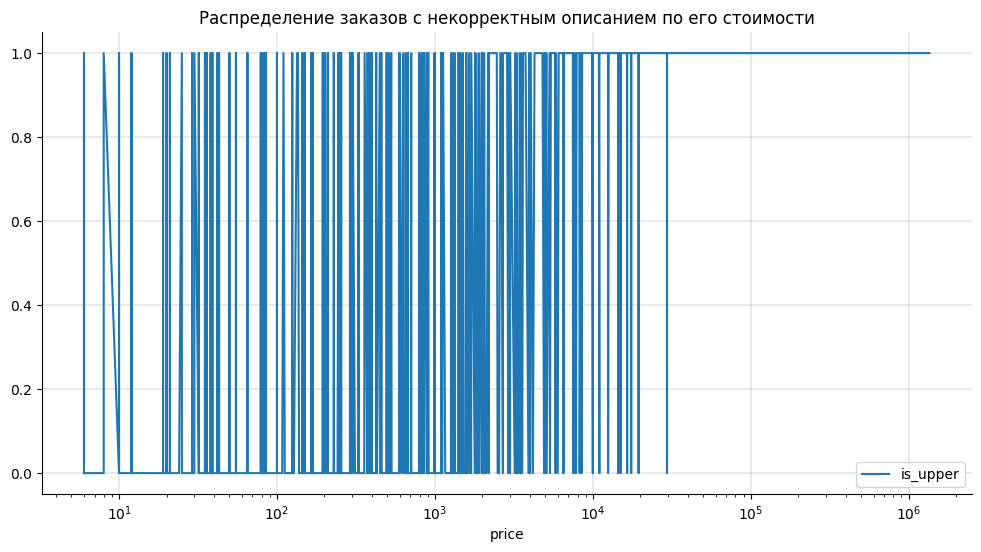

In [ ]:
fig, ax = plt.subplots( figsize=(12, 6))
sns.despine(left=False, ax=ax)

df.query("price > 0 and quantity > 0")\
    .assign(is_upper=lambda row: row["entry"].str.isupper().astype(int))\
    .sort_values(by="price").set_index("price")\
    [["is_upper"]].plot(ax=ax)
ax.grid( color='grey', lw=0.25)
ax.set_xscale("log")
ax.set_title("Распределение заказов с некорректным описанием по его стоимости");

По графику видно, что начиная с 20000 все описания товара написаны "капсом". Посмотрим детальнее на интервал цен от 5000 до 20000 и расчитаем долю заказов, описания которых написаны капсом:

<Axes: xlabel='price_gr'>

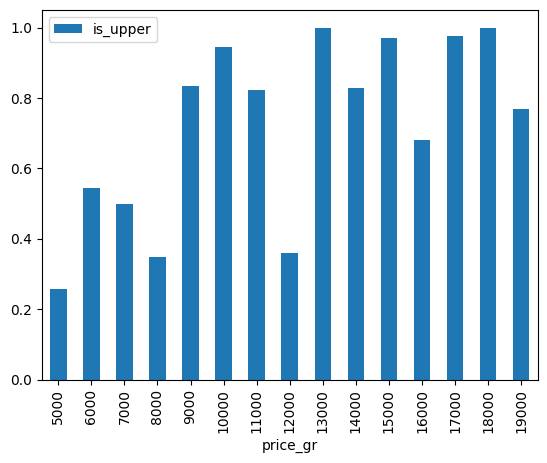

In [ ]:
df.query("price > 0 and quantity > 0")\
    .assign(is_upper=lambda row: row["entry"].str.isupper().astype(int))\
    .assign(price_gr=lambda row: row["price"] // 1000 * 1000)\
    .query("price > 5000 and price <= 20000")\
    .groupby("price_gr")\
    .agg({"is_upper": "mean"}).plot(kind="bar")

Исходя из графика можно принять интервал цен до 12000. Но сначала проверим долю товаров, описание которых написаны капсом:

In [ ]:
df.query("price > 0 and quantity > 0")\
    .assign(is_upper=lambda row: row["entry"].str.isupper().astype(int))["is_upper"].mean()

0.00668101362391615

Доля < 1%, кажется, что можно избавиться от них. На всякий случай проверим еще уникальные значения других полей среди написанных капсом

In [ ]:
df.query("price > 0 and quantity > 0")\
    .assign(is_upper=lambda row: row["entry"].str.isupper().astype(int))\
    .groupby("is_upper").agg({"order_id": "nunique", "customer_id": lambda x: (x == -1).mean(),
                             "entry": "nunique"})\
    .assign(share_uniq=lambda row: row["entry"] / row["order_id"])

,order_id,customer_id,entry,share_uniq
is_upper,,,,
0,18680,0.256262,2809,0.150375
1,2219,0.358756,9,0.004056


Теперь точно можно решить, что написанное капсом не выглядит как нормальные заказы:
- Количество уникальных позиций на порядки меньше: 0.4% против 15%.


Исходя из полученной информации можно принять решение об удалении таких значений.

In [ ]:
df = df.query('entry.str.isupper() == 0')

Данный отфильтрованы. Доля отфильтрованных значений ~ 0,007.

<Axes: >

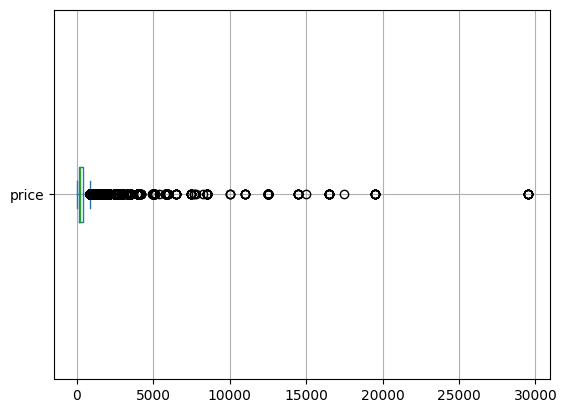

In [ ]:
df.query("price > 0 and quantity > 0")\
    .assign(is_upper=lambda row: row["entry"].str.isupper().astype(int))\
    .query("is_upper==False")\
    ["price"].plot.box(vert = False, grid=True)

При цене от 10000 наблюдаются единичные выбросы, но их можно оставить.

In [ ]:
df['price'].describe()

count    349258.000000
mean        317.639081
std         447.403115
min           0.000000
25%         125.000000
50%         208.000000
75%         413.000000
max       29500.000000
Name: price, dtype: float64

Изучим записи с нулевой стоимостью:

In [ ]:
df.query('price == 0')

,entry_date,order_id,customer_id,quantity,price,name_clust,entry_id,country_id,entry
5859,2018-05-12 14:02:00,3863,7353,1,0,719,1608,6,"круглая форма для торта, винтажная, зеленая"
9018,2018-07-12 11:48:00,4200,-1,2,0,721,1537,28,коробка из 24 коктейльных зонтов
9019,2018-07-12 11:48:00,4200,-1,1,0,709,232,28,Зеленая чашка и блюдце в стиле регентства
9020,2018-07-12 11:48:00,4200,-1,1,0,844,778,28,Французский синий металлический дверной знак 7
9021,2018-07-12 11:48:00,4200,-1,1,0,844,776,28,Французский синий металлический дверной знак 5
...,...,...,...,...,...,...,...,...,...
325917,2019-11-25 15:57:00,45507,6744,12540,0,549,1248,28,"дизайн 3d бумажные наклейки, в асс"
338368,2019-02-12 16:38:00,47032,-1,6,0,122,322,28,Магниты на холодильник les enfants в ассортименте
338376,2019-02-12 16:38:00,47032,-1,6,0,371,1425,28,классическая стеклянная банка для печенья
349548,2019-08-12 13:58:00,48072,-1,240,0,17,1981,28,наполнитель из полиэстера 45х45см.


Количество записей с нулевой стоимостью - 311. Исключение этих записей из датасета не приведет к искажению данных.

Отфильтруем строки с нулевой стоимостью:

In [ ]:
df =df.query('price > 0')

Построим диаграмму размаха и гистограмму столбца price после фильтрации данных:

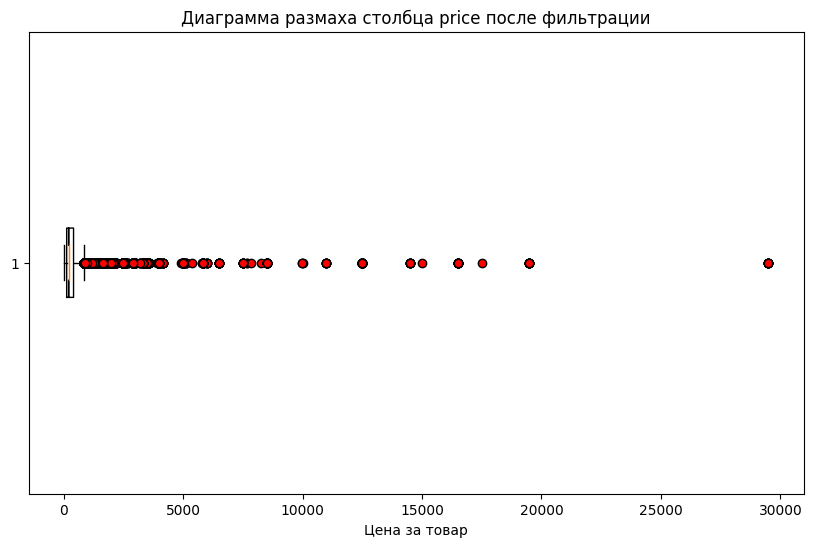

In [ ]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['price'],
            vert=False,
            notch=True,
            flierprops=dict(markerfacecolor='r', marker='o')
            )
plt.title('Диаграмма размаха столбца price после фильтрации')
plt.xlabel('Цена за товар')
plt.show()


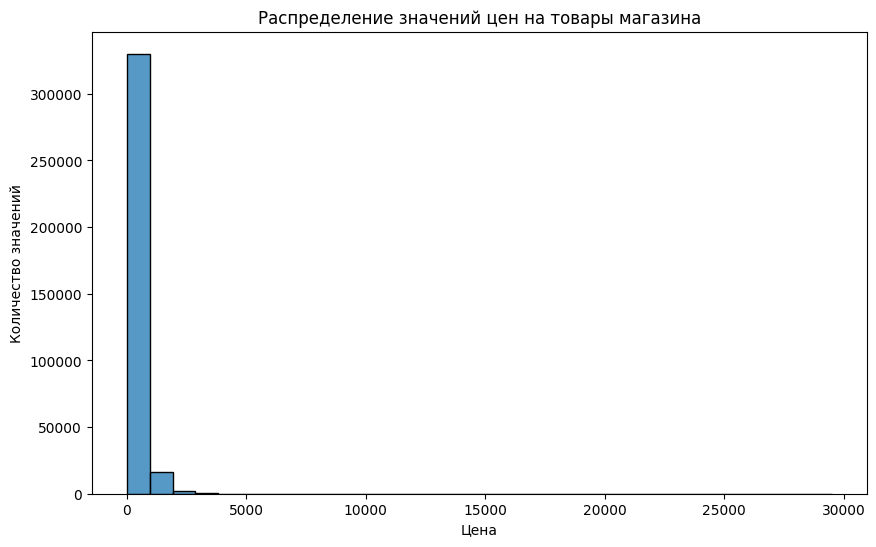

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data = df, x = 'price', bins = 31)
plt.title('Распределение значений цен на товары магазина')
plt.xlabel('Цена')
plt.ylabel('Количество значений')
plt.show()

Из графиков видно, что большинство значений сосредоточено в диапазоне от 1 до 1000 у.е. Максимальная цена - 29500 у.е.

##### Изучим столбец quantity:

In [ ]:
df['quantity'].describe(percentiles = [0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

count    348947.000000
mean         10.555508
std         141.758934
min           1.000000
25%           1.000000
50%           3.000000
75%          10.000000
90%          24.000000
95%          28.000000
99%         100.000000
max       80995.000000
Name: quantity, dtype: float64

Применил к столбцу quantity метод describe(). Исходя из полученной информации монжо сделать вывод, что в столбце есть аномальные значения. Меня заинтересовало наличие очень больших значений в этом столбце. 99 перцентиль для этого столбца равен 100, тогда как максимальное значение - 80995. Разберемся с этим:

In [ ]:
outliers = df['quantity'].quantile(0.99)
outliers

100.0

99 перцентиль равен 100. Посмотрим, какие значения находятся между 99 и 100 перцентилем:

In [ ]:
df.query("price > 0 and quantity > 100")\
    .sort_values(by="quantity", ascending=False).head(50)

,entry_date,order_id,customer_id,quantity,price,name_clust,entry_id,country_id,entry
350826,2019-09-12 09:15:00,48149,3554,80995,208,325,2204,28,"поделка из бумаги, маленькая птичка"
175422,2019-07-19 17:04:00,27265,5391,3186,6,223,832,28,"Эфирный бальзам 3,5г банка в конверте"
281397,2019-02-11 11:24:00,40661,3692,3000,32,608,1720,28,маленькие ножницы в китайском стиле
58406,2019-02-16 12:10:00,10818,5391,2400,6,223,832,28,"Эфирный бальзам 3,5г банка в конверте"
20562,2018-12-16 10:35:00,5767,3971,2400,94,223,1138,28,вырастить мухоловку или подсолнух в консервной...
273452,2019-10-27 12:11:00,39669,5354,2400,208,274,2053,16,ночник в форме кролика
55928,2019-11-02 11:22:00,10335,3971,2400,94,223,1138,28,вырастить мухоловку или подсолнух в консервной...
79807,2019-03-20 10:37:00,13703,5899,2160,25,559,2719,28,упаковка из 12 салфеток черепа
283838,2019-03-11 15:47:00,40960,3667,2100,106,536,1568,28,красная гармошка в коробке
331940,2019-11-29 15:52:00,46164,7202,2040,179,274,2053,12,ночник в форме кролика


Из всех рассматриваемых значений аномальным кажется только запись с количеством 80995. Остальные записи можно отнести к реальным(оптовые покупатели). Отфильтруем эту запись:

In [ ]:
df = df.query('quantity <= 3186')
df['quantity'].describe()

count    348946.000000
mean         10.323425
std          36.061478
min           1.000000
25%           1.000000
50%           3.000000
75%          10.000000
max        3186.000000
Name: quantity, dtype: float64

Теперь построим графики, отображающие распределение значений в столбце quantity:

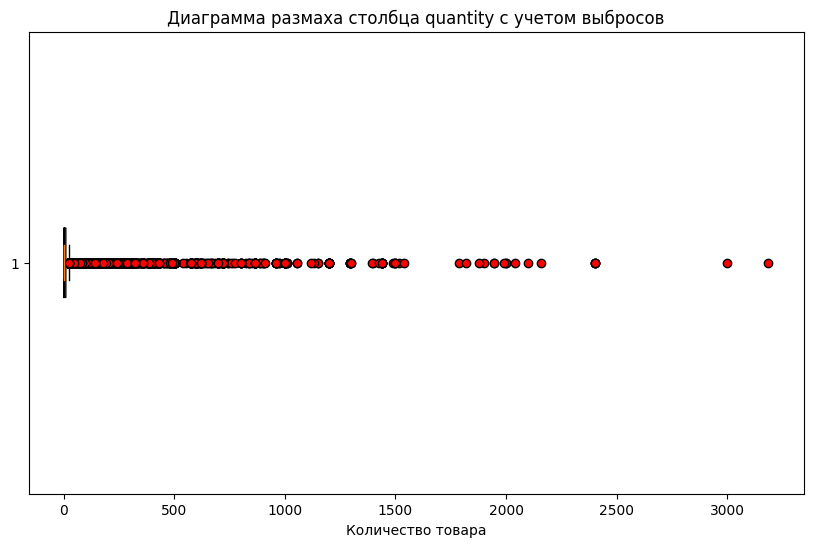

In [ ]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['quantity'],
            vert=False,
            notch=True,
            flierprops=dict(markerfacecolor='r', marker='o'))
plt.title('Диаграмма размаха столбца quantity с учетом выбросов')
plt.xlabel('Количество товара')
plt.show()

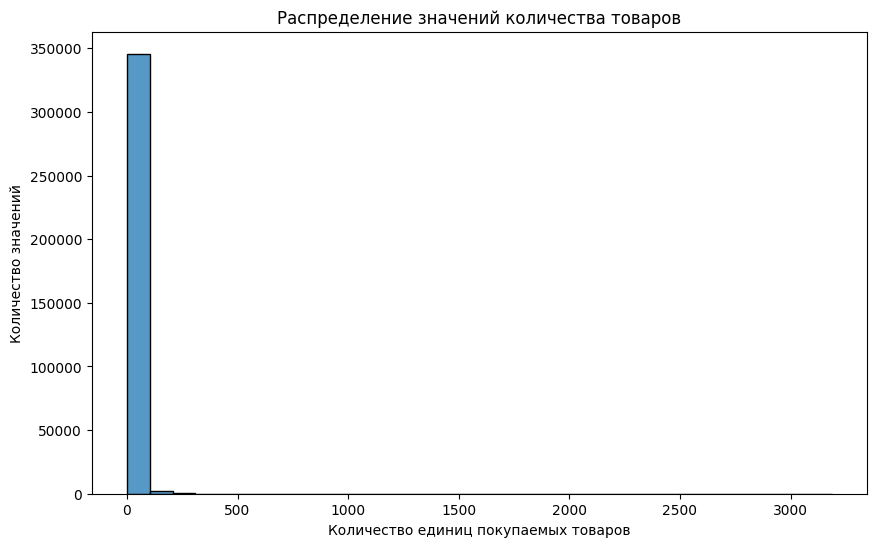

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data = df, x = 'quantity', bins = 31)
plt.title('Распределение значений количества товаров')
plt.xlabel('Количество единиц покупаемых товаров')
plt.ylabel('Количество значений')
plt.show()

Большинство значение столбца quantity находится диапазоне от 1 до 100. Мы отфильтровали 1 запись. После фильтрации данные стали более "чистыми".

#### Изучите столбцы order_id, customer_id, name_clust, entry_id и country_id.

Применим метод describe() ко всем вышеперечисленным столбцам:

In [ ]:
df[['order_id', 'customer_id', 'name_clust', 'entry_id', 'country_id']].describe(percentiles = [0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

,order_id,customer_id,name_clust,entry_id,country_id
count,348946.000000,348946.000000,348946.000000,348946.000000,348946.000000
mean,26707.460756,3495.628097,474.036198,1525.550277,26.784961
std,13374.225750,2535.695810,255.706446,828.208258,4.913020
min,3031.000000,-1.000000,1.000000,1.000000,0.000000
25%,14857.000000,-1.000000,250.000000,900.000000,28.000000
50%,27395.000000,3640.000000,452.000000,1561.000000,28.000000
75%,38512.000000,5633.000000,706.000000,2223.000000,28.000000
90%,44470.000000,6911.000000,832.000000,2646.000000,28.000000
95%,46443.000000,7286.000000,870.000000,2741.000000,28.000000
99%,47885.000000,7567.000000,914.000000,2888.000000,28.000000


Применил метод describe() к исследуемым столбцам. Меня заинтересовал столбец customer_id. В нем есть клиент с номером "-1". Разберемся, почему клиенту присвоили такой номер.
Остальные столбцы на первый взгляд выглядят корректными.

In [ ]:
df.groupby('customer_id').agg({'order_id' : 'nunique'}).sort_values('order_id', ascending = False).reset_index().head()

,customer_id,order_id
0,-1,1272
1,7252,195
2,2159,121
3,4689,91
4,5394,90


Определили топ-5 покупателей магазина. Клиент с номером "-1" совершил 1297 заказов. Предположим, что это крупный оптовый покупатель.

Узнаем, какое количество уникальных значений содержит каждый из исследуемых столбцов:

In [ ]:
df[['order_id', 'customer_id', 'name_clust', 'entry_id', 'country_id']].nunique()

order_id       18679
customer_id     4242
name_clust       904
entry_id        2808
country_id        30
dtype: int64

Построим гистарамму распределения значений в каждом из столбцов:

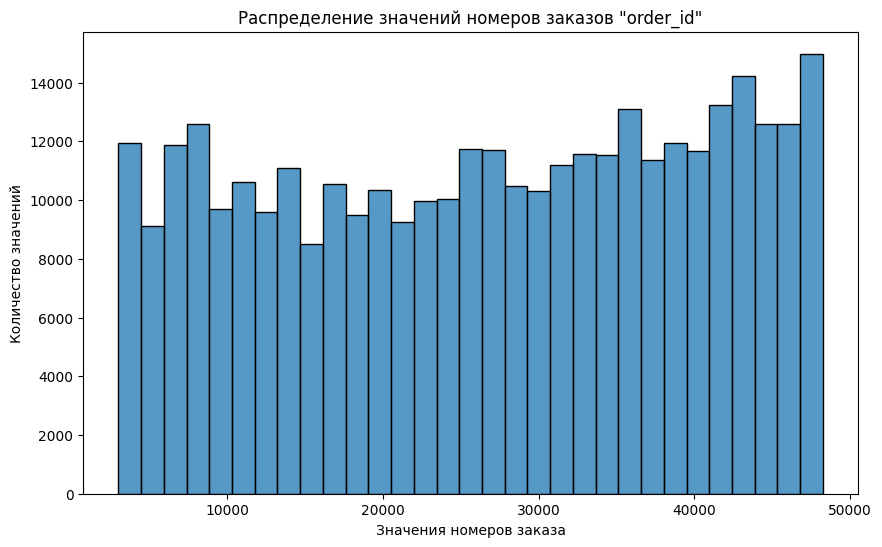

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data = df, x = 'order_id', bins = 31)
plt.title('Распределение значений номеров заказов "order_id"')
plt.xlabel('Значения номеров заказа')
plt.ylabel('Количество значений')
plt.show()

Значения в столбце order_id имеют равномерное распределение.

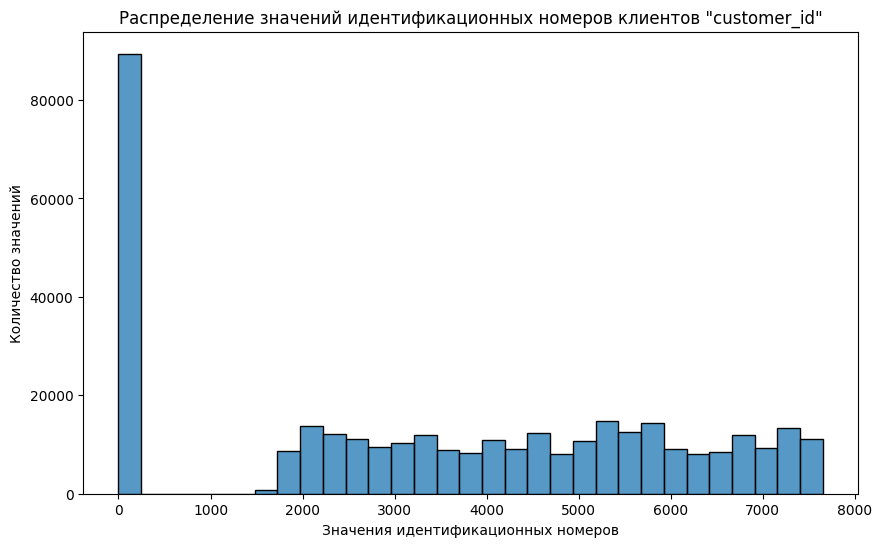

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data = df, x = 'customer_id', bins = 31)
plt.title('Распределение значений идентификационных номеров клиентов "customer_id"')
plt.xlabel('Значения идентификационных номеров')
plt.ylabel('Количество значений')
plt.show()

Заметим, что в данных отстутствуют значения от 800 до 1500. Однако, на анализ это не повлияет.

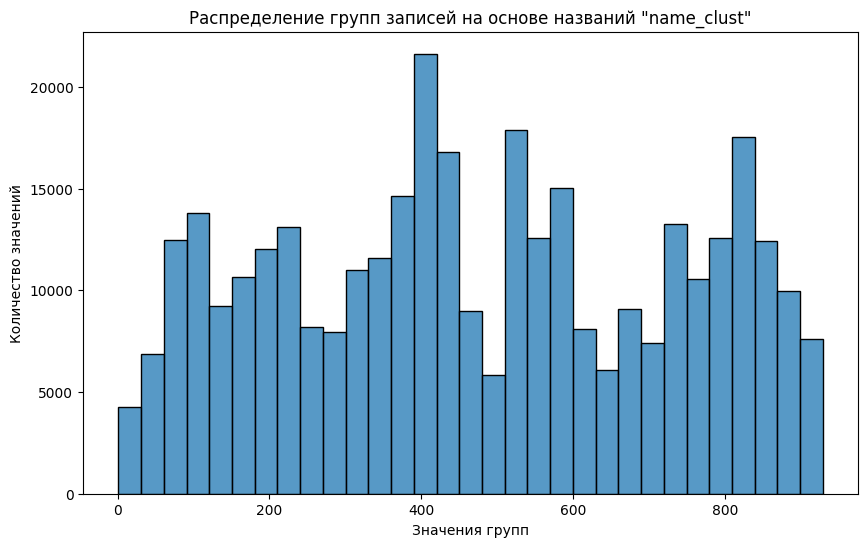

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data = df, x = 'name_clust', bins = 31)
plt.title('Распределение групп записей на основе названий "name_clust"')
plt.xlabel('Значения групп')
plt.ylabel('Количество значений')
plt.show()

Значения в столбце name_clust имеют равномерное распределение.

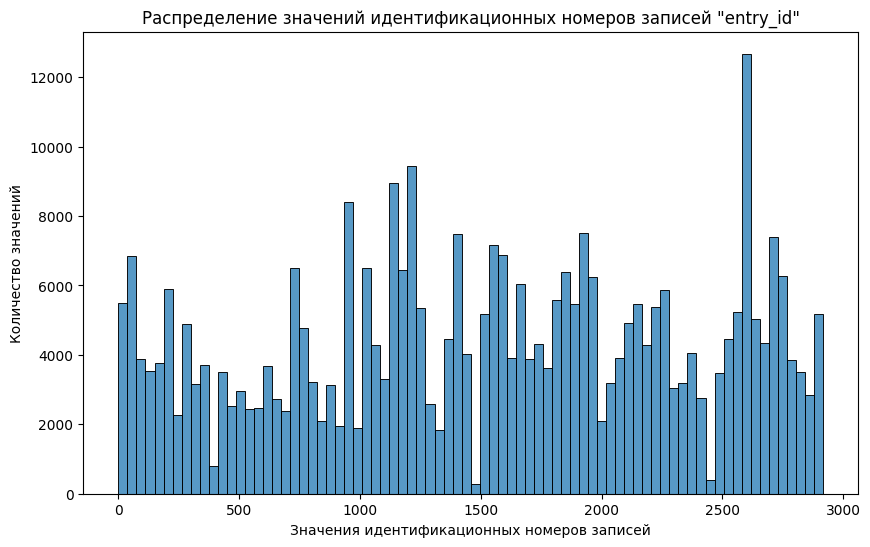

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data = df, x = 'entry_id')
plt.title('Распределение значений идентификационных номеров записей "entry_id"')
plt.xlabel('Значения идентификационных номеров записей')
plt.ylabel('Количество значений');

Значения в столбце entry_id имеют равномерное распределение.

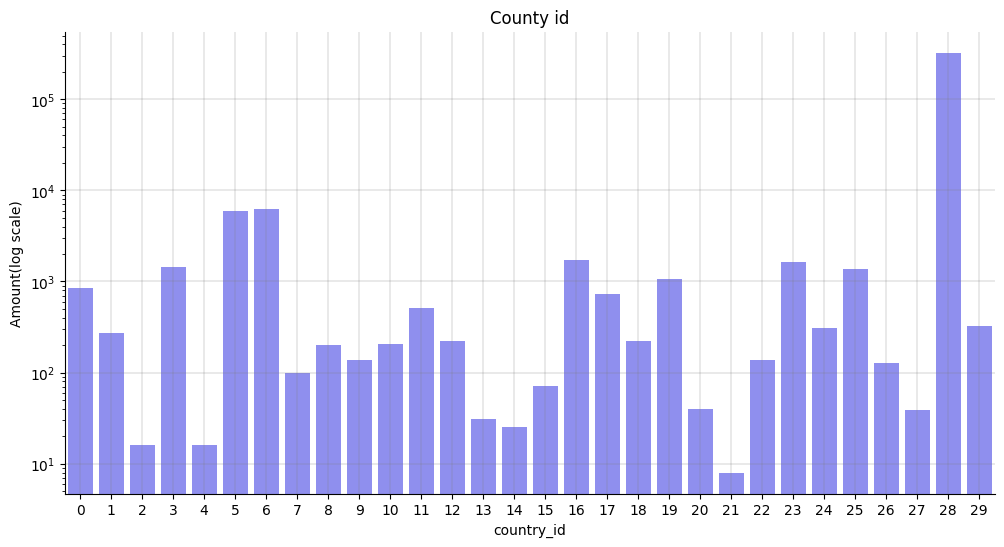

In [ ]:
fig, ax = plt.subplots( figsize=(12, 6))
sns.despine(left=False, ax=ax)
sns.countplot(data=df, x="country_id", color="blue", alpha=0.5, ax=ax)
ax.grid( color='grey', lw=0.25)
ax.set_yscale("log")
ax.set_ylabel("Amount(log scale)")
ax.set_title("County id");

На графике распределения значений в столбце country_id видно, что большинство значений имеет идентификационный номер страны 28. Аномальности в этом нет, так как вероятно именно в этой стране было совершено наибольшее количество покупок.

Аномальных значений в данных столбцах не обнаружено.

Рассчитаем сумму стоимости каждой товарной позиции в датасете:

In [ ]:
df['sum'] = df['price'] * df['quantity']
df.head()

,entry_date,order_id,customer_id,quantity,price,name_clust,entry_id,country_id,entry,sum
0,2018-01-12 08:26:00,3031,2150,6,339,740,891,28,белый металлический фонарь,2034
1,2018-01-12 08:26:00,3031,2150,8,275,132,1596,28,кремовая вешалка в форме сердечек Купидона,2200
2,2018-01-12 08:26:00,3031,2150,6,339,197,166,28,Вязаная грелка с флагом Союза,2034
3,2018-01-12 08:26:00,3031,2150,2,765,767,1810,28,набор 7 скворечников для бабушек,1530
4,2018-01-12 08:26:00,3031,2150,6,425,383,2585,28,стеклянный матовый держатель в форме звезды,2550


#### Изучите полноту данных, анализируя время записей. Посчитайте по месяцам количество дней, в которых не было продаж. Выберите период для анализа, содержащий основную часть данных, и далее работайте только с актуальными данными.

Создадим последовательность всех дней между минимальной и максимальной датой в рассматриваемых данных.
После этого объединим исходные даты и созданную последовательность дат.

In [ ]:
df_dates = pd.DataFrame({
    "date": pd.date_range(df["entry_date"].dt.date.min(), df["entry_date"].dt.date.max(), freq="D")
}).merge(df[["entry_date"]].assign(date=lambda x: pd.to_datetime(x["entry_date"].dt.date)),
         on="date", how="left")

df_dates.head()

,date,entry_date
0,2018-01-12,2018-01-12 08:26:00
1,2018-01-12,2018-01-12 08:26:00
2,2018-01-12,2018-01-12 08:26:00
3,2018-01-12,2018-01-12 08:26:00
4,2018-01-12,2018-01-12 08:26:00


Построим график распределения записей о продажах по дням:

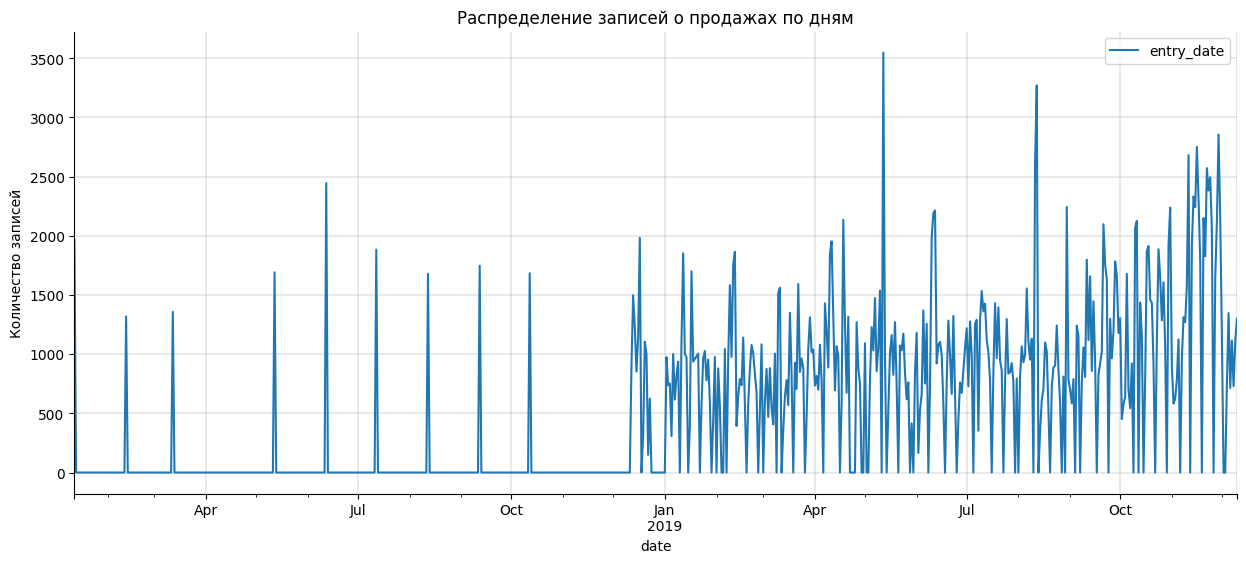

In [ ]:
fig, ax = plt.subplots( figsize=(15, 6))
sns.despine(left=False, ax=ax)
df_dates.groupby("date").agg({"entry_date": "count"}).plot(ax=ax)
ax.grid( color='grey', lw=0.25)
ax.set_ylabel("Количество записей")
ax.set_title("Распределение записей о продажах по дням")
plt.show();

Из графика видно, что полные данные начинаются с конца декабря 2018 года. Для удобства оставим данные только за 2019 год.
Отфильтруем данные по дате:

In [ ]:
filter = round(1-len(df.query('entry_date >= "2019-01-01 00:00:00"')) / (len(df)), 2)
print(f'Доля отфильтрованных значений: {filter}.')
df = df.query('entry_date >= "2019-01-01 00:00:00"')
df['entry_date'].min()

Доля отфильтрованных значений: 0.08.


Timestamp('2019-01-02 08:23:00')

Данные отфильтрованы. Доля отфильтрованных данных ~1%.

### Расчёт метрик

#### Оцените по часам и дням недели количество заказов и количество уникальных покупателей. Постройте графики и сделайте вывод о наличии цикличности в покупательской активности.

##### Проведем оценку количества уникальных покупателей по месяцам:

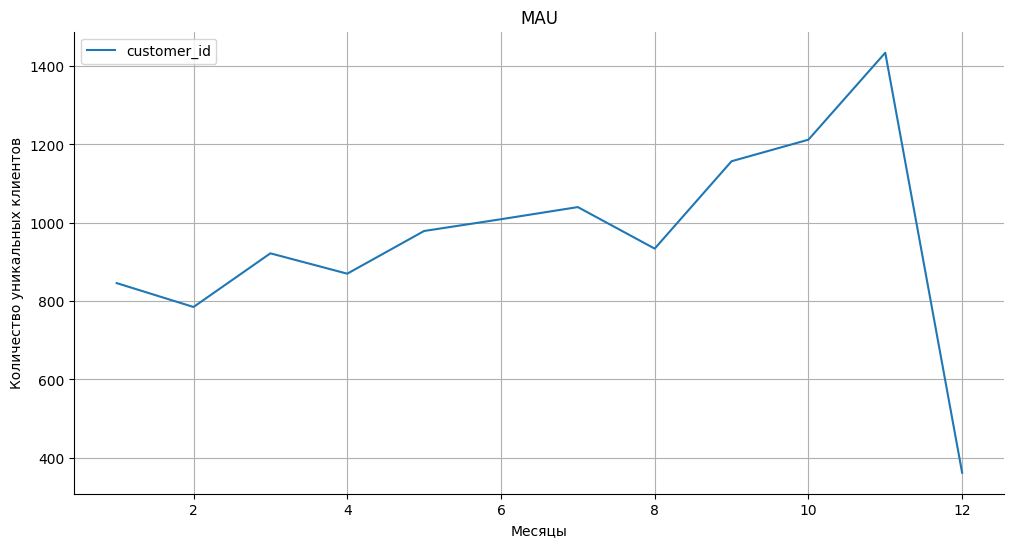

In [ ]:
fig, ax = plt.subplots( figsize=(12, 6))
sns.despine(left=False, ax=ax)

df.assign(date=lambda row: pd.to_datetime(row["entry_date"].dt.date),
                             month_dt=lambda row: row["entry_date"].dt.month)\
    .query("date >= '2019-01-01'")\
    .groupby("month_dt")\
    .agg({"customer_id": "nunique"})\
    .plot(y="customer_id",ax=ax)
ax.grid(True)
ax.set_xlabel("Месяцы")
ax.set_ylabel("Количество уникальных клиентов")
ax.set_title("MAU");


Построил график MAU. На нем видно, что в течение года график имеет положительный тренд, однако с ноября начинается резкий спад посетителей. Посмотрим, не изменилась ли полнота данных после фильтрации?:

In [ ]:
df_q = df.copy()
df_q['entry_date'] = df_q['entry_date'].dt.month
df_q.groupby('entry_date').agg({'order_id' : 'nunique'}).reset_index()

,entry_date,order_id
0,1,1246
1,2,1111
2,3,1346
3,4,1321
4,5,1540
5,6,1550
6,7,1554
7,8,1446
8,9,1663
9,10,1728


In [ ]:
df_q = df_raw.copy()
df_q['entry_date'] = df_q['entry_date'].dt.month
df_q.groupby('entry_date').agg({'order_id' : 'nunique'}).reset_index()

,entry_date,order_id
0,1,1382
1,2,1258
2,3,1435
3,4,1356
4,5,1648
5,6,1674
6,7,1674
7,8,1597
8,9,1806
9,10,1870


In [ ]:
df_raw['entry_date'].max()

Timestamp('2019-12-10 17:19:00')

Действительено, мы отфильтровали довольно большое количество данных за декабрь. Но изначально записей за декабрь было меньше, чем в остальные месяцы. Причина в том, что у нас изначально были данные только до 10 декабря. А в остальных месяцах данные за полный месяц.

##### Проведем оценку количества заказов по месяцам:

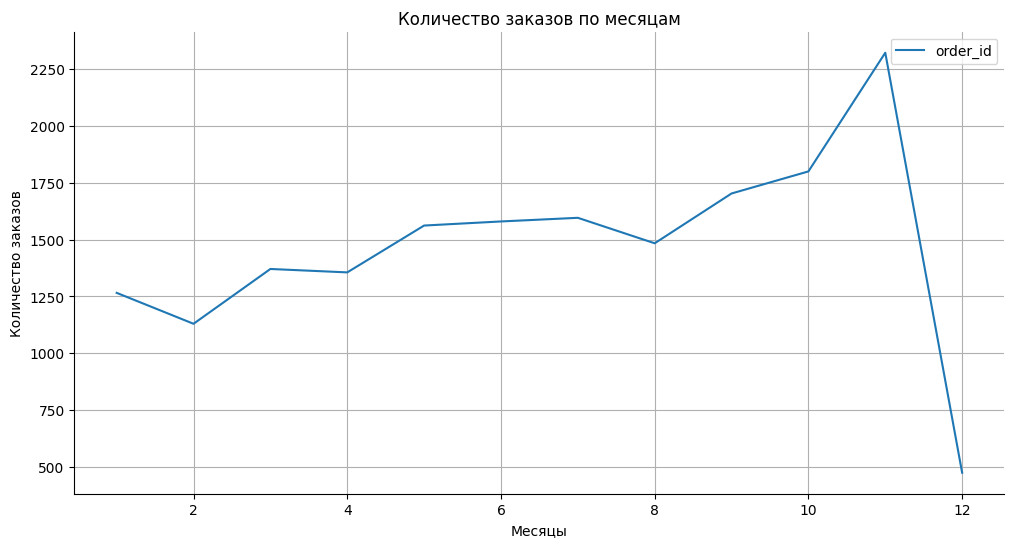

In [ ]:
fig, ax = plt.subplots( figsize=(12, 6))
sns.despine(left=False, ax=ax)

df_raw.assign(date=lambda row: pd.to_datetime(row["entry_date"].dt.date),
                             month_dt=lambda row: row["date"].dt.month)\
    .query("date >= '2019-01-01'")\
    .groupby("month_dt")\
    .agg({"order_id": "nunique"})\
    .plot(y="order_id",ax=ax)
ax.grid(True)
ax.set_xlabel("Месяцы")
ax.set_ylabel("Количество заказов")
ax.set_title("Количество заказов по месяцам");


Построил график количества заказов по месяцам. График похож на график MAU. Можно сделать вывод, что MAU имеет прямую зависимость от количества заказов.

##### Проведем оценку количества заказов по часам:

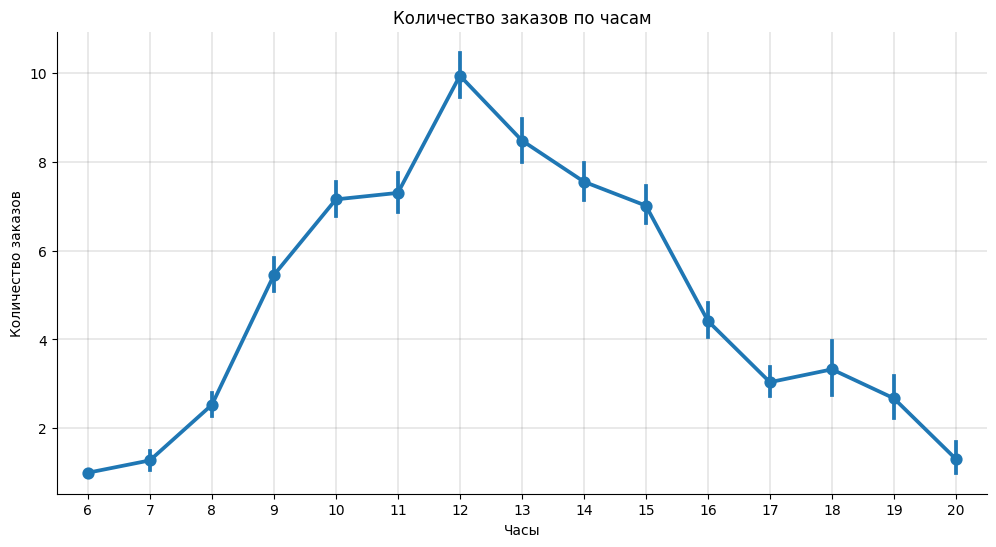

In [ ]:
df_hourly = df.loc[df["entry_date"] > '2019-01-01']\
                  .assign(hour_dt=lambda row: row["entry_date"].dt.to_period("H"),
                         hour=lambda row: row["entry_date"].dt.hour)\
    .groupby(["hour_dt", "hour"], as_index=False)\
    .agg({"order_id": "nunique"})\
    .rename(columns={"order_id": "orders_cnt"})

fig, ax = plt.subplots( figsize=(12, 6))
sns.despine(left=False, ax=ax)
sns.pointplot(data=df_hourly,
              x="hour", y="orders_cnt",
              ax=ax
             )
ax.grid( color='grey', lw=0.25)
ax.set_xlabel("Часы")
ax.set_ylabel("Количество заказов")
ax.set_title("Количество заказов по часам");

Построил график распределения количества заказов по часам. Видно, что пик заказов приходится на 12 часов. А период наибольшего количества заказов - с 9 до 16 часов.

##### Проведем оценку количества покупателей по часам

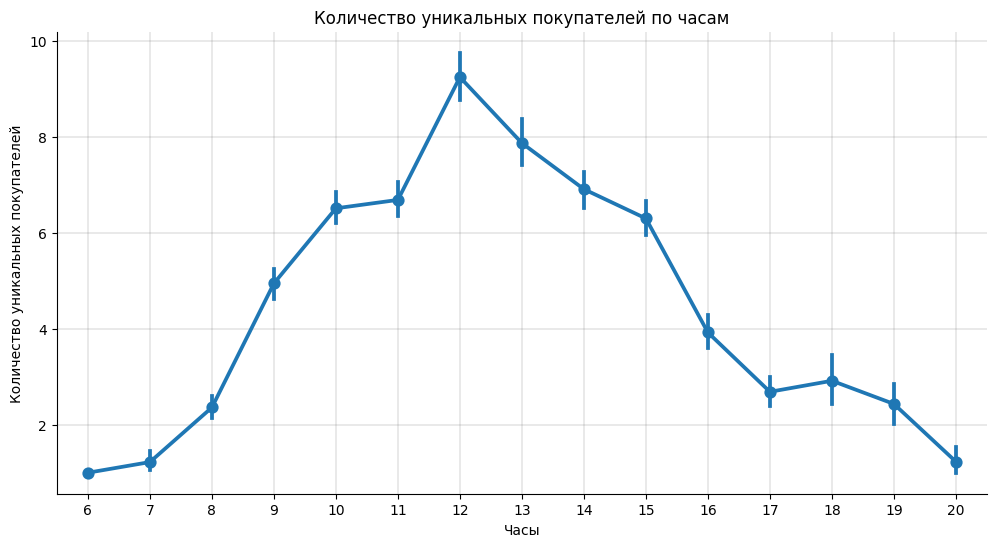

In [ ]:
df_hourly = df.loc[df["entry_date"] > '2019-01-01']\
                  .assign(hour_dt=lambda row: row["entry_date"].dt.to_period("H"),
                         hour=lambda row: row["entry_date"].dt.hour)\
    .groupby(["hour_dt", "hour"], as_index=False)\
    .agg({"customer_id": "nunique"})

fig, ax = plt.subplots( figsize=(12, 6))
sns.despine(left=False, ax=ax)
sns.pointplot(data=df_hourly,
              x="hour", y="customer_id",
              ax=ax
             )
ax.grid( color='grey', lw=0.25)
ax.set_xlabel("Часы")
ax.set_ylabel("Количество уникальных покупателей")
ax.set_title("Количество уникальных покупателей по часам");

##### Проведем оценку количества посетителей по дням:


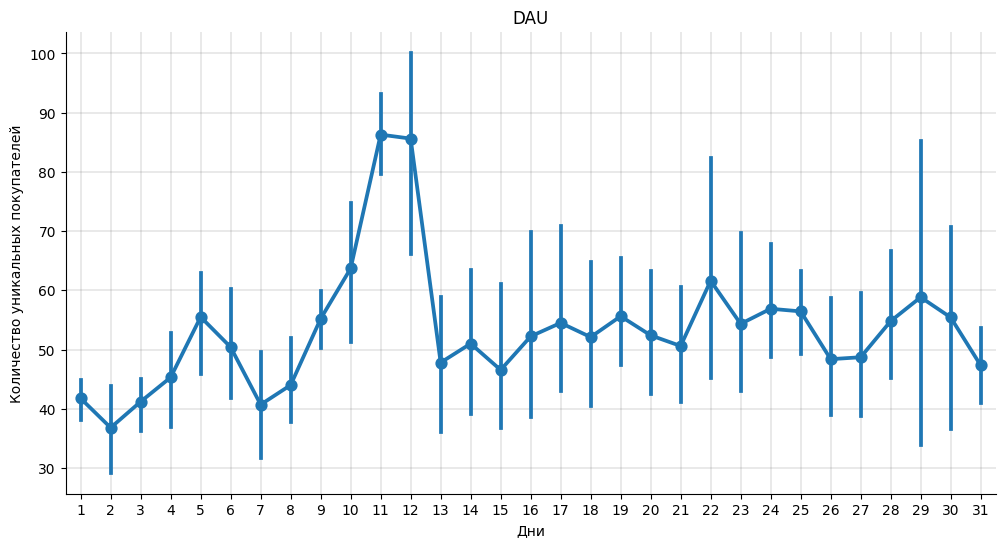

In [ ]:
df_dau = df.loc[df["entry_date"] > '2019-01-01']\
                  .assign(day_dt=lambda row: row["entry_date"].dt.to_period("D"),
                         day=lambda row: row["entry_date"].dt.day)\
    .groupby(["day_dt", "day"], as_index=False)\
    .agg({"customer_id": "nunique"})

fig, ax = plt.subplots( figsize=(12, 6))
sns.despine(left=False, ax=ax)
sns.pointplot(data=df_dau,
              x="day", y="customer_id",
              ax=ax
             )
ax.grid( color='grey', lw=0.25)
ax.set_xlabel("Дни")
ax.set_ylabel("Количество уникальных покупателей")
ax.set_title("DAU");

Построил график DAU. Пик показателя приходится на 10-12 число. Предположим, что это свяязано с тем, что в этих числах люди получают зарплату.

##### Проведем оценку количества заказов по дням:

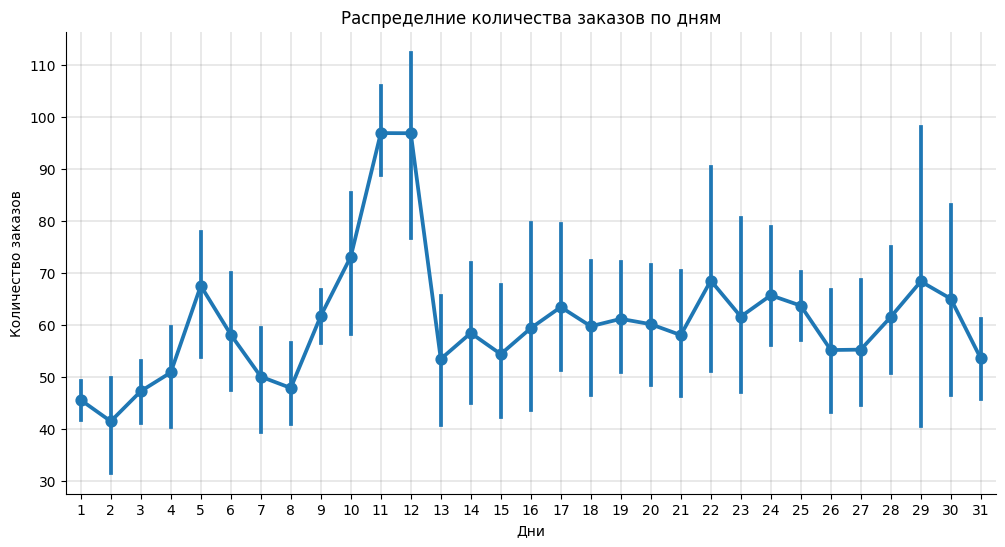

In [ ]:
df_dau = df.loc[df["entry_date"] > '2019-01-01']\
                  .assign(day_dt=lambda row: row["entry_date"].dt.to_period("D"),
                         day=lambda row: row["entry_date"].dt.day)\
    .groupby(["day_dt", "day"], as_index=False)\
    .agg({"order_id": "nunique"})

fig, ax = plt.subplots( figsize=(12, 6))
sns.despine(left=False, ax=ax)
sns.pointplot(data=df_dau,
              x="day", y="order_id",
              ax=ax
             )
ax.grid( color='grey', lw=0.25)
ax.set_xlabel("Дни")
ax.set_ylabel("Количество заказов")
ax.set_title("Распределние количества заказов по дням");

Данный график похож на график DAU. Еще одно подтверждение прямой зависимости количества посетителей от количества заказов.

На основе проведенного исследования можно сделать следующие выводы:

1. Количество посетителей и заказов растет от месяца к месяцу с января по ноябрь.
2. Количество посетителей имеет прямую зависимость с количеством заказов.
3. В течение дня пик покупательской активности приходится на промежуток с 10 до 15 часов
4. По графикам можно сделать вывод о цикличности посещаемости и количества заказов.

#### Рассчитайте по месяцам среднюю выручку с клиента в день. Сделайте вывод о наличии или отсутствии сезонности, если это возможно.

In [ ]:
df_mean = df.groupby(['customer_id', 'entry_date']).agg({'sum' : 'sum'}).reset_index()
df_mean.head()

,customer_id,entry_date,sum
0,-1,2019-01-02 10:56:00,37721
1,-1,2019-01-02 11:35:00,4105
2,-1,2019-01-02 12:22:00,7033
3,-1,2019-01-02 12:33:00,1050
4,-1,2019-01-02 15:12:00,94329


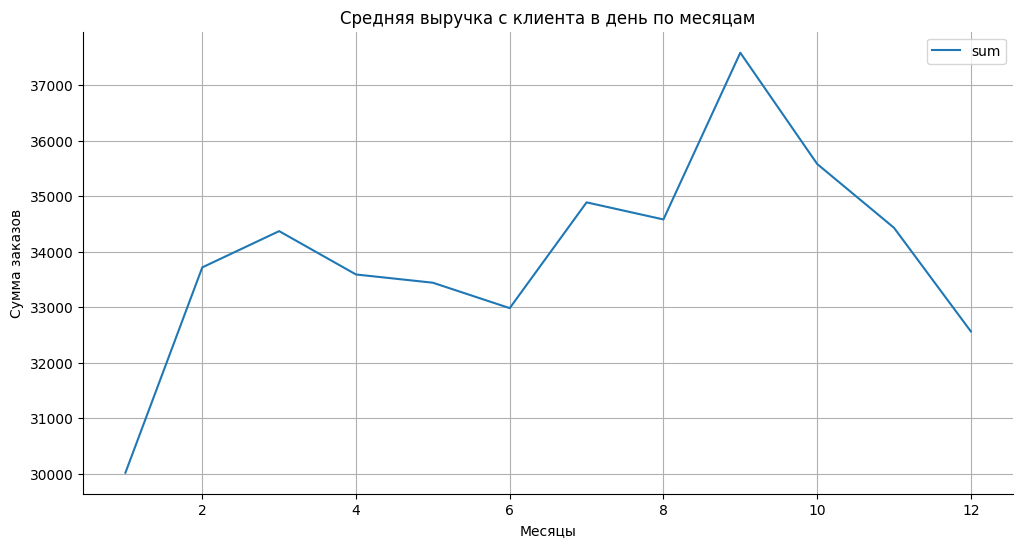

In [ ]:
fig, ax = plt.subplots( figsize=(12, 6))
sns.despine(left=False, ax=ax)

df_mean.assign(date=lambda row: pd.to_datetime(row["entry_date"].dt.date),
                             month_dt=lambda row: row["date"].dt.month)\
    .query("date >= '2019-01-01'")\
    .groupby("month_dt")\
    .agg({"sum": "mean"})\
    .plot(y="sum",ax=ax)
ax.grid(True)
ax.set_xlabel("Месяцы")
ax.set_ylabel("Сумма заказов")
ax.set_title("Средняя выручка с клиента в день по месяцам");

На основе этого исследования сделаем следующие выводы:

1. График имеет положительный тренд с января по сентябрь. Затем показатель резко падает.
2. В период с августа по сентябрь наблюдается резкий рост наблюдаемого показателя. Так что можно сказать, что в данном магазине есть сезонноть.

#### Рассчитайте стики-фактор за второй и третий квартал 2019 года.

Стики-фактор рассчитывают как DAU/MAU.
DAU Количество активных пользоателей в день.
MAU Количество активных пользователей в месяц

Рассчитаем DAU:

In [ ]:
df_dau = df.copy()
df_dau['entry_date'] = df_dau['entry_date'].dt.date
df_dau = df_dau.groupby('entry_date').agg({'customer_id' : 'nunique'}).reset_index()
df_dau['entry_date'] = pd.to_datetime(df_dau['entry_date'])
df_dau['entry_date'] = df_dau['entry_date'].dt.month
df_dau = df_dau.groupby('entry_date').agg({'customer_id' : 'mean'})
df_dau

,customer_id
entry_date,
1,42.807692
2,44.409091
3,45.538462
4,51.727273
5,54.500000
6,49.629630
7,50.925926
8,50.960000
9,57.307692


Рассчитаем MAU и стики-фактор за 2 и 3 квартал:

In [ ]:
df_mau = df.copy()
df_mau['entry_date'] = df_mau['entry_date'].dt.month
df_mau = df_mau.groupby('entry_date').agg({'customer_id' : 'nunique'}).reset_index()
df_stiky = df_dau.merge(df_mau, on = 'entry_date', how = 'left').rename(columns = {'customer_id_x' : 'DAU', 'customer_id_y' : 'MAU'})
df_stiky['Stiky'] = df_stiky['DAU'] / df_stiky['MAU']
df_stiky = df_stiky.query('3 < entry_date < 10')
df_stiky

,entry_date,DAU,MAU,Stiky
3,4,51.727273,870,0.059457
4,5,54.500000,979,0.055669
5,6,49.629630,1009,0.049187
6,7,50.925926,1040,0.048967
7,8,50.960000,934,0.054561
8,9,57.307692,1157,0.049531


Построим график стики-фактора за 2 и 3 квартал:

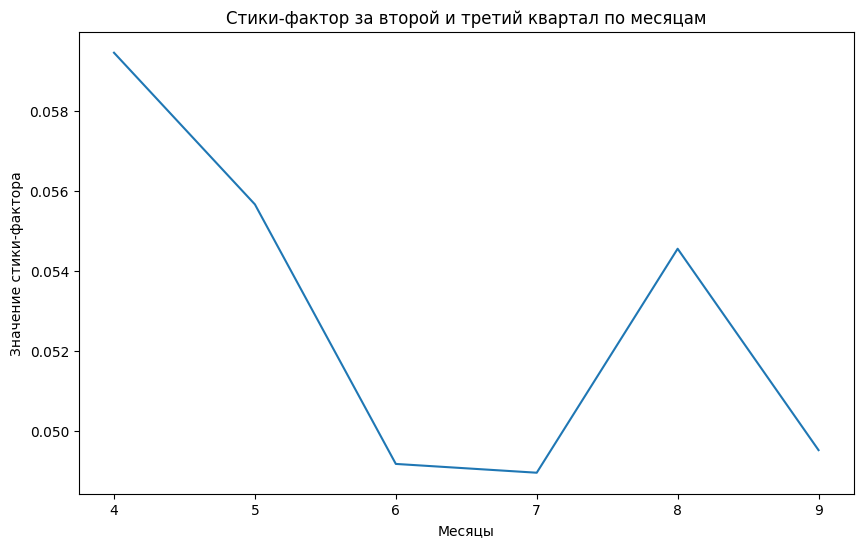

In [ ]:
df_stiky = df_stiky.query('3 < entry_date < 10')
plt.figure(figsize=(10, 6))
plt.plot(df_stiky['entry_date'], df_stiky['Stiky'])
plt.title('Стики-фактор за второй и третий квартал по месяцам')
plt.xlabel('Месяцы')
plt.ylabel('Значение стики-фактора');

Вывод: Стики-фактор довольно низкий (5-6%). Максимум наблюдается в апреле - 5,9%, минимум - в июле - 4,9%.

#### Составьте профиль каждого клиента, включите в профиль количество заказов, дату первого и последнего заказа, общую сумму всех заказов, среднюю цену заказа, а также другие показатели по вашему выбору.


In [ ]:
df_profile = df
df_profile['last_entry_date'] = df['entry_date']
df_profile['mean_sum'] = df['sum']

In [ ]:
profiles = (df_profile.sort_values(by=['customer_id', 'entry_date'])
    .groupby('customer_id')
    .agg({'entry_date': 'first', 'last_entry_date' : 'last', 'sum': 'sum', 'order_id' : 'nunique'})
    .reset_index()
    )
profiles['mean_sum'] = profiles['sum'] / profiles['order_id']
profiles = profiles.rename(columns = {'order_id' : 'nunique_order'})
profiles.head()

,customer_id,entry_date,last_entry_date,sum,nunique_order,mean_sum
0,-1,2019-01-02 10:56:00,2019-12-10 16:40:00,86272983,1128,76483.140957
1,1713,2019-05-22 10:39:00,2019-12-10 10:23:00,128270,3,42756.666667
2,1717,2019-01-23 14:58:00,2019-11-30 12:59:00,148035,14,10573.928571
3,1718,2019-02-12 11:43:00,2019-05-08 13:35:00,11886,2,5943.000000
4,1719,2019-12-06 10:53:00,2019-12-06 10:53:00,8082,1,8082.000000


Профили клиентов составлены. В профиль клиента входят следущие показатели: Идентификационный номер клиента, дата и время первого и последнего визита, сумма всех заказов, количество заказов, средняя сумма заказа.

#### Разделите клиентов на возвратных и нет по признаку наличия повторных покупок, для каждой из групп на основе профилей клиентов (когда это возможно) рассчитайте средние показатели и оцените их.

Для разделения пользователей на категории воспользуемся датасетом profiles. Добавим в него новую колонку return, в которой будет отображаться принадлежность к той или иной группе:

In [ ]:
profiles['return'] = 'Не возвратная категория клиентов'
profiles.loc[profiles['nunique_order'] > 1, 'return'] = 'Возвратная категория клиентов'


In [ ]:
profiles.head()

,customer_id,entry_date,last_entry_date,sum,nunique_order,mean_sum,return
0,-1,2019-01-02 10:56:00,2019-12-10 16:40:00,86272983,1128,76483.140957,Возвратная категория клиентов
1,1713,2019-05-22 10:39:00,2019-12-10 10:23:00,128270,3,42756.666667,Возвратная категория клиентов
2,1717,2019-01-23 14:58:00,2019-11-30 12:59:00,148035,14,10573.928571,Возвратная категория клиентов
3,1718,2019-02-12 11:43:00,2019-05-08 13:35:00,11886,2,5943.000000,Возвратная категория клиентов
4,1719,2019-12-06 10:53:00,2019-12-06 10:53:00,8082,1,8082.000000,Не возвратная категория клиентов


Добавил столбец return. Теперь посчитаем средние показатели для каждой из групп:

In [ ]:
profiles.groupby('return').agg({'sum' : 'mean', 'nunique_order' : 'mean', 'customer_id' : 'nunique'})


,sum,nunique_order,customer_id
return,,,
Возвратная категория клиентов,208772.001907,5.999237,2622
Не возвратная категория клиентов,24499.571809,1.000000,1504


Из таблицы видно, что больше половины посетителей магазина возращаются. Причем среднее количество заказов для возвратных клиентов - 6. Также средняя сумма заказов у возвратных клиентов заметно выше.

### Проведите RFM-сегментацию клиентов

#### разделите клиентов на группы по методике RFM;

Приведем дату в нужный нам формат, а также добавим дополнительный столбец в датасет, в нем будет указано количество дней с последнего заказа.

In [ ]:
df['entry_date'] = pd.to_datetime(df['entry_date'], format='%Y%m%d%H')
max_date = df['entry_date'].max()
df['entry_date_rfm'] = max_date - pd.to_datetime(df['entry_date'].dt.date)

In [ ]:
rfm = df.groupby('customer_id').agg(
    recency = ('entry_date_rfm', lambda x: x.min().days),
    frequency = ('order_id', 'nunique'),
    monetary_value = ('sum', 'sum')
).reset_index()
rfm.head()

,customer_id,recency,frequency,monetary_value
0,-1,0,1128,86272983
1,1713,0,3,128270
2,1717,10,14,148035
3,1718,216,2,11886
4,1719,4,1,8082


Сгруппировал данные для каждого пользователя. Теперь можно приступать к RFM-анализу:

In [ ]:
rfm.describe()

,customer_id,recency,frequency,monetary_value
count,4126.000000,4126.000000,4126.000000,4.126000e+03
mean,4695.847794,94.479399,4.176927,1.416014e+05
std,1715.877420,91.751461,18.562712,1.433187e+06
min,-1.000000,0.000000,1.000000,2.900000e+02
25%,3221.250000,22.000000,1.000000,1.948400e+04
50%,4699.500000,59.000000,2.000000,4.300350e+04
75%,6180.500000,152.000000,4.000000,1.053165e+05
max,7653.000000,342.000000,1128.000000,8.627298e+07


Применил к датасету rfm метод describe(). В стобце frequency данные расположены неравномерно, поэтому для расчета этого показателя необходимо самому указать границы интервалов:

In [ ]:
rfm['r'] = pd.qcut(rfm['recency'], q=3, labels=[3,2,1])
rfm['f'] = pd.qcut(rfm['frequency'], q= 4,labels=[1,2,3], duplicates = 'drop')
rfm['m'] = pd.qcut(rfm['monetary_value'], q=3, labels=[1,2,3])

In [ ]:
rfm[['r','f','m']] = rfm[['r','f','m']].astype('str')
rfm['rfm_group'] = rfm['r'] + rfm['f'] + rfm['m']

In [ ]:
rfm_group =rfm.groupby('rfm_group').agg({'customer_id' : 'nunique'}).reset_index()
rfm_group = rfm_group.sort_values('customer_id',ascending = False)
rfm_group.head()

,rfm_group,customer_id
0,111,721
26,333,592
9,211,367
1,112,365
10,212,294


Вывел топ-5 групп среди клиентов магазина. Для более наглядного отображения построим график:

#### Оцените получившиеся группы, найдите похожие и различающиеся;

In [ ]:
fig = px.treemap(rfm_group,
                 path=['rfm_group'],
                 values='customer_id',
                 color_continuous_scale='Sunset',
                 title='RFM сегментация пользователей интернет-магазина')
fig.show()

#### Cформулируйте рекомендации для бизнеса по взаимодействию с сегментами.

Два самых больших сегмента это клиенты которые покупали давно, мало и на маленькую сумму и их противоположность - клиенты, которые покупают часто, много и на большую сумму. Для этих категорий рекомендуется применить следующую стратегию: добавить программу лояльности, скидки за объем покупок. Для активной категории можно добавить индивидуальное обслуживание (закрепить за такими клиентами персонального меннеджера)

Также целесообразно добавить акции и промокоды для остальных сегментов пользователей. Для клиентов, которые давно не совершали покупки можно добавить рассылки со специальными предложениями, чтобы реактивировать таких клиентов.

Выведем усредненные показатели по каждому из признаков для топ-5 сегментов:

In [ ]:
rfm.query('rfm_group == ["111", "333", "211", "112", "212"]')\
    .groupby('rfm_group')\
    .agg({'recency' : 'mean', 'frequency' : 'mean', 'monetary_value' : 'mean'})\
    .reset_index()

,rfm_group,recency,frequency,monetary_value
0,111,221.934813,1.140083,13030.969487
1,112,211.695890,1.435616,40907.257534
2,211,64.724796,1.220708,14072.002725
3,212,65.435374,1.544218,42322.965986
4,333,12.859797,14.155405,602931.101351


### Проверьте статистические гипотезы

#### Сравните доли возвратных и невозвратных клиентов за второй и третий квартал 2019 года при помощи подходящего статистического теста.

Так как нам необходимо сравнить доли, то мы вопользуемся z-тестом:

Рассчитаем доли клиентов во втором квартале:

In [ ]:
lim2 = datetime.datetime.strptime('2019-04-01 00:00:00', '%Y-%m-%d %H:%M:%S')
limx2 = datetime.datetime.strptime('2019-06-30 23:59:59', '%Y-%m-%d %H:%M:%S')
df_stat = profiles.query('(entry_date >= @lim2) & (entry_date <= @limx2)')

In [ ]:
return_2 = (df_stat.loc[df_stat['return'] == 'Возвратная категория клиентов', 'customer_id'].nunique()) / df_stat['customer_id'].nunique()
not_return2 = (df_stat.loc[df_stat['return'] == 'Не возвратная категория клиентов', 'customer_id'].nunique()) / df_stat['customer_id'].nunique()
print(f'Доля возвратных клиентов за 2 квартал: {return_2}.')
print(f'Доля не возвратных клиентов за 2 квартал: {not_return2}.')

Доля возвратных клиентов за 2 квартал: 0.6568527918781726.
Доля не возвратных клиентов за 2 квартал: 0.3431472081218274.


Рассчитаем доли клиентов в третьем квартале:

In [ ]:
lim3 = datetime.datetime.strptime('2019-07-01 00:00:00', '%Y-%m-%d %H:%M:%S')
limx3 = datetime.datetime.strptime('2019-09-30 23:59:59', '%Y-%m-%d %H:%M:%S')
df_stat3 = profiles.query('(entry_date >= @lim3) & (entry_date <= @limx3)')

In [ ]:
return_3 = (df_stat3.loc[df_stat3['return'] == 'Возвратная категория клиентов', 'customer_id'].nunique()) / df_stat3['customer_id'].nunique()
not_return3 = (df_stat3.loc[df_stat3['return'] == 'Не возвратная категория клиентов', 'customer_id'].nunique()) / df_stat3['customer_id'].nunique()
print(f'Доля возвратных клиентов за 3 квартал: {return_3}.')
print(f'Доля не возвратных клиентов за 2 квартал: {not_return3}.')

Доля возвратных клиентов за 3 квартал: 0.4704225352112676.
Доля не возвратных клиентов за 2 квартал: 0.5295774647887324.


Проведем статистический тест:
Проверим следующую гипотезу: Доля возвратных клиентов не изменилась. - это будет нулевая гипотеза H0.
Альтернативная гипотеза - Доля возвратных клиентов увеличилась. (Во время проведения статистического теста зададим дополнительный параметр alternative = 'smaller')

In [ ]:
tot2 = return_2 + not_return2
tot3 = return_3 + not_return3
alpha = 0.05
z_stat, p_value = proportions_ztest([return_2, return_3], [tot2, tot3], alternative = 'smaller')
print(f"Z-статистика: {z_stat}, P-value: {p_value}")

Z-статистика: 0.26581394897783883, P-value: 0.6048087500741075


Сделаем проверку по уровню значимости:

In [ ]:
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: различия статистически значимы.")
else:
    print("Не отвергаем нулевую гипотезу: статистически значимых различий нет.")

Не отвергаем нулевую гипотезу: статистически значимых различий нет.


Статистический тест показал, что значимых различий между долями возвратных и не воозвратных клиентов во 2 и 3 квартале нет. Тем самым мы принимаем нулевую гипотезу: "Доля возвратных клиентов не изменилась".

#### Сравните средние чеки в странах с country_id, равному 3, 6 и 24. На основе статистических тестов сделайте вывод о том, отличаются ли средние чеки в этих странах или нет.

Для проведения статистического теста о сравнении средних чеков в трёх странах нам понадобятся данные о размерах средних чеков покупателей из каждой страны:

In [ ]:
df_cnt = df.groupby(['country_id', 'order_id']).agg({'sum' : 'sum'}).reset_index()
df_cnt3 = df_cnt.loc[df_cnt['country_id'] == 3, 'sum']
df_cnt6 = df_cnt.loc[df_cnt['country_id'] == 6, 'sum']
df_cnt24 = df_cnt.loc[df_cnt['country_id'] == 24, 'sum']

Проведем статистический тест о сравнении средних. В качестве нулевой гипотезы будем считать - Средние чеки в этих странах не различаются. Альтернативная гипотеза - Средние чеки в этих странах различаются.


Посмотрим, как распределены выборки:

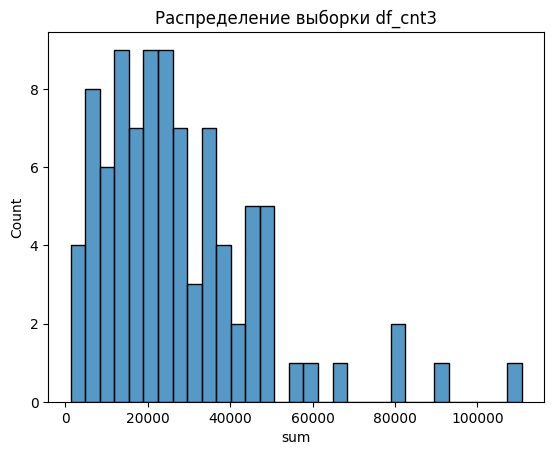

In [ ]:
sns.histplot(df_cnt3, bins = 31)
plt.title('Распределение выборки df_cnt3');

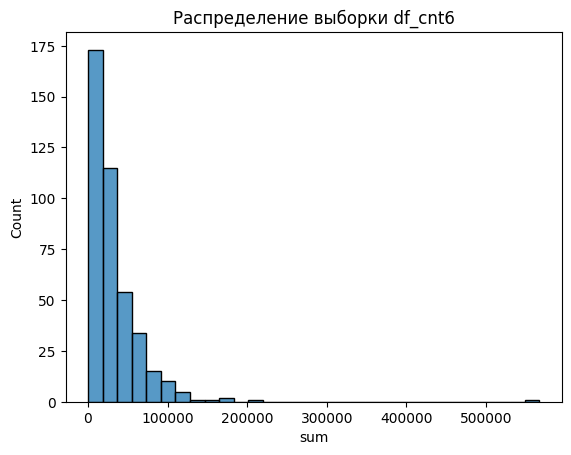

In [ ]:
sns.histplot(df_cnt6, bins = 31)
plt.title('Распределение выборки df_cnt6');

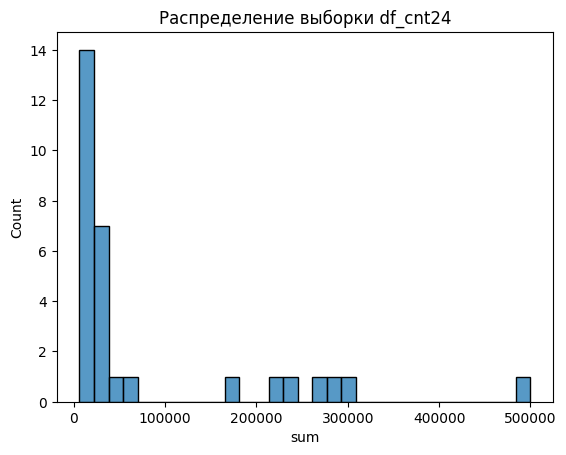

In [ ]:
sns.histplot(df_cnt24, bins = 31)
plt.title('Распределение выборки df_cnt24');

Так как выборки не подчиняются нормальному распределению и имеют выбросы, то целесообразно провести тест Манна-Уитни. В отличие от обычного t-теста, тест Манна-Уитни не требует, чтобы все выборки имели нормальное распределение и не имели выбросов. Добавим дополнительный аргумент alternative = 'two-sided', так как нам интересен только вопрос: отличается ли?

Так как мы будем проводить множественную проверку гипотез, нам необходимо будет воспользоваться поправкой Бонферрони. Мы хотим проверить три гипотезы, следователь уровень значимости нужно будет скорректировать:

In [ ]:
alpha_r = alpha / 3
t_stat, p_value = mannwhitneyu(df_cnt3, df_cnt6, alternative = 'two-sided')
print(f"t_stat: {t_stat}, p_value: {p_value}")
if p_value < alpha_r:
    print("Отвергаем нулевую гипотезу: различия статистически значимы.")
else:
    print("Не отвергаем нулевую гипотезу: статистически значимых различий нет.")

t_stat: 18897.5, p_value: 0.9658961011585928
Не отвергаем нулевую гипотезу: статистически значимых различий нет.


In [ ]:
t_stat, p_value = mannwhitneyu(df_cnt6, df_cnt24, alternative = 'two-sided')
print(f"t_stat: {t_stat}, p_value: {p_value}")
if p_value < alpha_r:
    print("Отвергаем нулевую гипотезу: различия статистически значимы.")
else:
    print("Не отвергаем нулевую гипотезу: статистически значимых различий нет.")

t_stat: 5535.0, p_value: 0.3400233508715035
Не отвергаем нулевую гипотезу: статистически значимых различий нет.


In [ ]:
t_stat, p_value = mannwhitneyu(df_cnt3, df_cnt24, alternative = 'two-sided')
print(f"t_stat: {t_stat}, p_value: {p_value}")
if p_value < alpha_r:
    print("Отвергаем нулевую гипотезу: различия статистически значимы.")
else:
    print("Не отвергаем нулевую гипотезу: статистически значимых различий нет.")

t_stat: 1280.0, p_value: 0.5541381433169035
Не отвергаем нулевую гипотезу: статистически значимых различий нет.


На основе тестов мы можем отвергнуть нулевую гипотезу и принять альтернативную - Средние чеки в этих странах отличаются.

#### Отличается ли средний чек покупателей во втором квартале 2019 года от среднего чека в третьем квартале 2019 года?

Сформулируем нулевую гипотезу - Средний чек покупателей во втором квартале 2019 года равен среднему чеку в третьем квартале 2019 года. Альтернативная гипотеза - Средний чек покупателей во втором квартале 2019 года не равен среднему чеку в третьем квартале 2019 года.

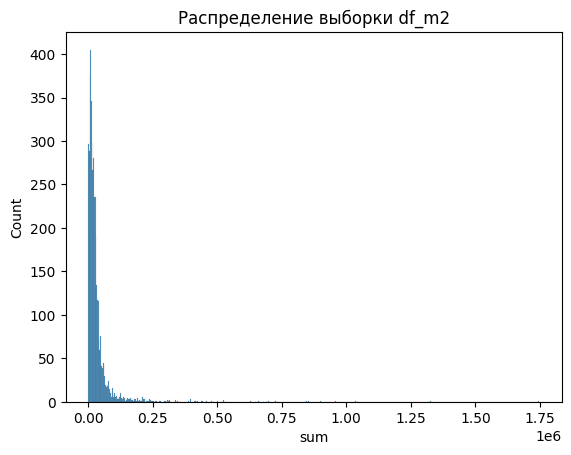

In [ ]:
df_m2 = df.query('(entry_date >= @lim2) & (entry_date <= @limx2)')\
.groupby(['country_id', 'order_id']).agg({'sum' : 'sum'}).reset_index()['sum']
sns.histplot(df_m2)
plt.title('Распределение выборки df_m2');

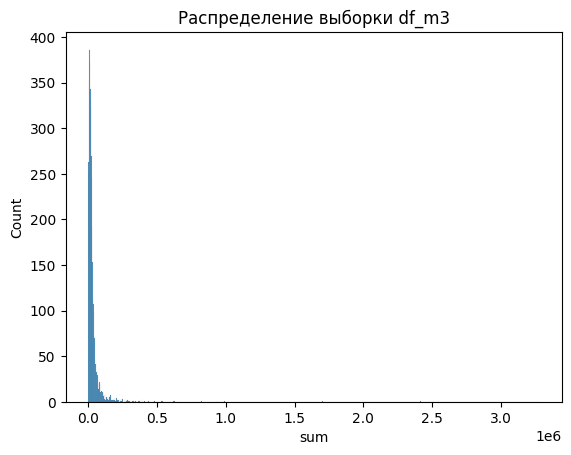

In [ ]:
df_m3 = df.query('(entry_date >= @lim3) & (entry_date <= @limx3)')\
.groupby(['country_id', 'order_id']).agg({'sum' : 'sum'}).reset_index()['sum']
sns.histplot(df_m3)
plt.title('Распределение выборки df_m3');

При проведении статистического теста будем учитывать, что дисперсии и распределения у выборок отличаются. Также в выборках содержатся выбросы. Поэтому будем проводить u-test (Манна-Уитни). Добавим дополнительный аргумент alternative = 'two-sided', так как нам интересен только вопрос: изменяется ли?

In [ ]:
t_stat, p_value = mannwhitneyu(df_m2, df_m3, alternative = 'two-sided')
print(f"t_stat: {t_stat}, p_value: {p_value}")
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: различия статистически значимы.")
else:
    print("Не отвергаем нулевую гипотезу: статистически значимых различий нет.")

t_stat: 9961710.5, p_value: 0.009707162921659108
Отвергаем нулевую гипотезу: различия статистически значимы.


По результатам проведенного статистического теста мы отвергаем нулевую гипотезу и принимаем альтернативную - Средний чек покупателей во втором квартале 2019 года не равен среднему чеку в третьем квартале 2019 года. Это также подтвержадется исследованием в пункте 2.4.2.

### Опишите полученные результаты и зафиксируйте итоговый вывод проведённого исследования.

Основные выводы исследования:

1. В магазине есть цикличность покупателей. Основные часы, в которые совершаются покупки с 11 до 15 часов.
2. Стики-фактор магазина очень низкий. Это говорит о недостаточной вовлеченности пользователей в продукт. Необходимо стимулировать клиентов к покупкам, используя рассылки, промокоды, акции итд.
3. Средний чек в магазине имеет небольшую зависимость от сезонности. Следовательно, люди покупают подарки не только на общие праздники (такие как Новый год, 8 марта итд.), но и на день рождения и другие праздники. Однако, в период с августа по сентябрь люди покупают больше всего. Можно предположить, что внедрение программ лояльности, акций и рассылок должно усилить сезонность покупок в магазине. Так как в случае напоминания, клиенты будут чаще заходить на сайт магазина и, следовательно, больше покупать.
4. Количество посещений интернет-магазина имеет прямую зависимость с объемом выручки. Т.е. чем больше посетителей зашло на сайт, тем больше выручка.
5. Необходимо провести таргетированные действия по удержанию, реактивации и стимулированию к большему объему покупок по ключевым сегментам пользователей.
6. Средние чеки в разных странах отличаются. Возможно это связано с благосостоянием жителей той или иной страны.
7. Большая категория покупаетей делает покупки редко и на маленькую сумму. Эту категорию надо стимулировать к покупкам больше остальных.
8. Больше всего покупок совершаются в районе 10 числа каждого месяца. Это можно связать с тем, что люди в эти дни обычно получают зарплату.